In [3]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from injectfrb.injectfrb.simulate_frb import gen_simulated_frb

#打开背景数据
bkg_file = '/data/jcw_data/heimdall_GCs/combine_fits/NGC5466_tracking_0355_Fdsamp1_combined.fits'
hdul = fits.open(bkg_file)
bkg_header = hdul[1].header
nchan = int(bkg_header['nchan']) #频率通道个数
nsblk = int(bkg_header['nsblk']) #一个子积分的点的个数
nline = int(bkg_header['naxis2']) #有多少个子积分
dt = bkg_header['tbin'] #采样时间步长
bkg_data = hdul[1].data['data'].astype('float') #读取数据
bkg_data = np.ravel(bkg_data) #将数据展成一维
bkg_data = np.reshape(bkg_data, (nchan, nline * nsblk)) #将数据重新reshape成（频率，时间）
print('bkg_data.shape: ', bkg_data.shape)

bkg_data.shape:  (3280, 524288)


In [9]:
nbin = bkg_data.shape[1] #一共有多少时间点
freqs = hdul[1].data['dat_freq'][0] #频率值
low_freq = freqs[0] #最低频率
hight_freq = freqs[-1] #最高频率

#模拟参数
number = 1000
fluence = np.random.lognormal(3.5, 1, number) #Jy ms
dm = np.random.uniform(10, 5000, number) # pc cm^-3
width = np.random.uniform(0.5, 50, number)/1000 #ms
spec_ind = np.random.uniform(-4, 4, number) 
scat_tau_ref = np.random.uniform(0, width, number) #ms

#开始模拟，测试较大的fluence方便看看
i = 0
FRB, others = gen_simulated_frb(fluence=1e6, 
                                dm=dm[i],
                                width=width[i],
                                spec_ind=spec_ind[i], 
                                scat_tau_ref=scat_tau_ref[i], 
                                NTIME=bkg_data.shape[-1], 
                                sim=True, 
                                NFREQ=nchan, 
                                background_noise=bkg_data, 
                                delta_t=dt,
                                plot_burst=False, 
                                freq=(low_freq, hight_freq), 
                                FREQ_REF=hight_freq, 
                                scintillate=True,
                                disp_ind=2., 
                                conv_dmsmear=True, 
                                )
FRB[FRB >= 255] = 255
FRB[FRB <= 0] = 0
FRB = FRB.astype('uint8')
FRB = np.ravel(FRB) #将数据展成一维
hdul[1].data['data'] = FRB.reshape(nline, nsblk * nchan)

In [13]:
#保存数据
hdul.writeto('/data/FRB0718A.fits', overwrite=True) 

In [14]:
#读取FRB数据
FRB_file = '/data/FRB0718A.fits'
hdul = fits.open(FRB_file)
FRB_header = hdul[1].header
nchan = int(FRB_header['nchan']) #频率通道个数
nsblk = int(FRB_header['nsblk']) #一个子积分的点的个数
nline = int(FRB_header['naxis2']) #有多少个子积分
dt = FRB_header['tbin'] #采样时间步长
FRB_data = hdul[1].data['data'].astype('float') #读取数据
FRB_data = np.ravel(FRB_data) #将数据展成一维
FRB_data = np.reshape(FRB_data, (nchan, nline * nsblk)) #将数据重新reshape成（频率，时间）
print('FRB_data.shape: ', FRB_data.shape)

FRB_data.shape:  (3280, 524288)


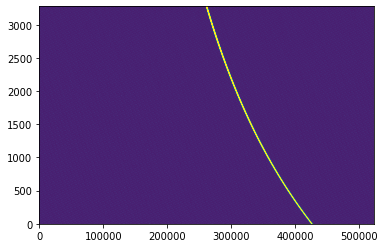

In [15]:
#画图展示
plt.imshow(FRB_data, aspect='auto', origin='lower')